# Vigenère Cipher Tools
## This is a brouillon notebook just to keep ideas and information in one place, feel free to use/ change anything

## Introduction
Cryptography is the art of secure communication. In this course, we will explore the Vigenère Cipher, a method of encrypting alphabetic text by using a simple form of polyalphabetic substitution. We will start with the ceasar cipher, and build upon what we have learned for rhe Vigenère.

## Table of Contents
1. [Introduction](#introduction)
2. [The Ceasar cipher](#ceasar)
3. [Vigenère Cipher Implementation in Python](#python-implementation)
4. [Encryption and Decryption Examples](#examples)
5. [Cracking Vigenère Cipher](#cracking)


## The Ceasar cipher 
The ceasar cipher is a very simple encryption technique used by Julius Ceasar to communicate in secret with his allies. According to the Roman historian Suetonius, he used to encode his messages using the key 3. 

The encryption scheme is very simple: Every letter of the alphabet is mapped to it's place in the alphabet (e.g A-> 0, B -> 1, Z -> 25)

To encrypt a message m we have: Enc_k(m) = (m + k)mod 26

To decrypt Dec_k(c) = (c - k)mod 26

For example if we used the same key as Ceasar, we would shift each letter of our message by three : A becomes D, Z becomes C etc..

So The encryption of HELLO, would be : KHOOR


In [2]:
def caesar_cipher(text, key):
    encrypted_text = ""
    for c in text:
        if c.isalpha():
            shifted_char = chr((ord(c) - ord('A' if c.isupper() else 'a') + key) % 26 + ord('A' if c.isupper() else 'a'))
            encrypted_text += shifted_char
        else:
            encrypted_text += c
    return encrypted_text

# Encrypting a message using Caesar Cipher
plaintext_caesar = "test"
shift = 3
caesar_encrypted_text = caesar_cipher(plaintext_caesar, shift)

# Decrypting the Caesar Cipher
caesar_decrypted_text = caesar_cipher(caesar_encrypted_text, -shift)

print(f"Original Text: {plaintext_caesar}")
print(f"Caesar Encrypted Text: {caesar_encrypted_text}")
print(f"Caesar Decrypted Text: {caesar_decrypted_text}")

Original Text: test
Caesar Encrypted Text: whvw
Caesar Decrypted Text: test


## Deciphering the ceasar cipher
The ceasar cipher is very easy to decipher

-bruteforce
-frequency analysis 

In [3]:
#Bruteforce

import string

def caesar_bruteforce(ct):
    """Decrypts a Caesar cipher by bruteforcing all possible keys

    Args:
        ct (str): the ciphertext

    Returns:
        str: the plaintext
    """
    decrypted_messages = []
    for shift in range(1, 26):
        decrypted_text = ''
        for char in ct:
            if char.isalpha():
                shifted_char = chr((ord(char) - shift - 65) % 26 + 65) if char.isupper() else chr((ord(char) - shift - 97) % 26 + 97)
                decrypted_text += shifted_char
            else:
                decrypted_text += char
        decrypted_messages.append(decrypted_text)
    return decrypted_messages

# Example
ciphertext = "Wklv lv d whvw phvvdjh"
decrypted_messages = caesar_bruteforce(ciphertext)
for message in decrypted_messages:
    print(message)


#Frequency Analysis (Only works on a big text)

def caesar_frequency_analysis(ciphertext):
    letter_frequencies = {char: 0 for char in string.ascii_uppercase}
    for char in ciphertext:
        if char.isalpha():
            char = char.upper()
            letter_frequencies[char] += 1
    
    most_common_letter = max(letter_frequencies, key=letter_frequencies.get)
    shift = ord(most_common_letter) - ord('E')
    
    decrypted_text = ''
    for char in ciphertext:
        if char.isalpha():
            shifted_char = chr((ord(char) - shift - 65) % 26 + 65) if char.isupper() else chr((ord(char) - shift - 97) % 26 + 97)
            decrypted_text += shifted_char
        else:
            decrypted_text += char
    return decrypted_text

# Example usage
ciphertext = "Wklv lv d whvw wr vhh li lw zrunv, exw vlqfh lw lv iru iuhtxhqfb dqdobvlv, lw qhhgv wr eh d orqjhu whaw rwkhuzlvh zh zrq'w jhw d jrrg hqrxjk lghd ri zklfk ohwwhuv duh xvhg wkh prvw"
decrypted_text = caesar_frequency_analysis(ciphertext)
print(decrypted_text)

Vjku ku c vguv oguucig
Uijt jt b uftu nfttbhf
This is a test message
Sghr hr z sdrs ldrrzfd
Rfgq gq y rcqr kcqqyec
Qefp fp x qbpq jbppxdb
Pdeo eo w paop iaoowca
Ocdn dn v ozno hznnvbz
Nbcm cm u nymn gymmuay
Mabl bl t mxlm fxlltzx
Lzak ak s lwkl ewkksyw
Kyzj zj r kvjk dvjjrxv
Jxyi yi q juij cuiiqwu
Iwxh xh p ithi bthhpvt
Hvwg wg o hsgh asggous
Guvf vf n grfg zrffntr
Ftue ue m fqef yqeemsq
Estd td l epde xpddlrp
Drsc sc k docd wocckqo
Cqrb rb j cnbc vnbbjpn
Bpqa qa i bmab umaaiom
Aopz pz h alza tlzzhnl
Znoy oy g zkyz skyygmk
Ymnx nx f yjxy rjxxflj
Xlmw mw e xiwx qiwweki
This is a test to see if it works, but since it is for frequency analysis, it needs to be a longer text otherwise we won't get a good enough idea of which letters are used the most


## The Vigenère
The Ceasar cipher is very easily crackable with frequency analysis and even simply by bruteforce.
So here is how the Vigenère cipher works: explain in a nice and clearer way than with code 


## Vigenère Cipher Implementation in Python <a id='python-implementation'></a>

Now, let's implement the Vigenère Cipher encryption and decryption functions in Python

In [4]:
import string

def generate_vigenere_table():
    """Generates a Vigenère table
    """
    alphabet = string.ascii_uppercase
    vigenere_table = {}
    for char in alphabet:
        shift = alphabet.index(char)
        shifted_alphabet = alphabet[shift:] + alphabet[:shift]
        vigenere_table[char] = shifted_alphabet
    return vigenere_table

vigenere_table = generate_vigenere_table()


def encrypt_vigenere(pt, sk, spaces_and_punctuation = True):
    """Encrypts a Vigenère cipher by applying the key mod 26

    Args:
        pt (str): the the plaintext
        sk (str): the secret key
        spaces_and_punctuation (bool): whether to keep spaces and punctuation


    Returns:
        str: the ciphertext
    """
    encrypted_text = ""
    sk_repeated = (sk * (len(pt) // len(sk))) + sk[:len(pt) % len(sk)]
    for plain_char, key_char in zip(pt, sk_repeated):
        if plain_char.isalpha():
            shift = ord(key_char.upper()) - ord('A')
            if plain_char.islower():
                encrypted_char = vigenere_table[key_char.upper()][ord(plain_char.upper()) - ord('A')].lower()
            else:
                encrypted_char = vigenere_table[key_char.upper()][ord(plain_char.upper()) - ord('A')]
            encrypted_text += encrypted_char
        else:
            if(spaces_and_punctuation):
                encrypted_text += plain_char
    return encrypted_text

def decrypt_vigenere(ct, sk, spaces_and_punctuation = True):


    """Decrypts a Vigenère cipher by applying the key mod 26

    Args:
        ct (str): the ciphertext
        sk (str): the secret key
        spaces_and_punctuation (bool): whether to keep spaces and punctuation

    Returns:
        str: the plaintext
    """
    decrypted_text = ""
    sk_repeated = (sk * (len(ct) // len(sk))) + sk[:len(ct) % len(sk)]
    for cipher_char, key_char in zip(ct, sk_repeated):
        if cipher_char.isalpha():
            shift = ord(key_char.upper()) - ord('A')
            if cipher_char.islower():
                decrypted_char = chr((ord(cipher_char.upper()) - ord('A') - shift) % 26 + ord('a'))
            else:
                decrypted_char = chr((ord(cipher_char.upper()) - ord('A') - shift) % 26 + ord('A'))
            decrypted_text += decrypted_char
        else:
            if(spaces_and_punctuation):
                decrypted_text += cipher_char
    return decrypted_text


## Encryption and Decryption Examples <a id='examples'></a>
Let's encrypt and decrypt some messages using the Vigenère Cipher.

In [5]:
plaintext = ""
keyword = "key"
encrypted_text = encrypt_vigenere(plaintext, keyword)
decrypted_text = decrypt_vigenere(encrypted_text, keyword)

print(f"Original Text: {plaintext}")
print(f"Encrypted Text: {encrypted_text}")
print(f"Decrypted Text: {decrypted_text}")

Original Text: 
Encrypted Text: 
Decrypted Text: 


## Cracking Vigenère Cipher <a id='cracking'></a>
In the real world, attackers might try to crack the Vigenère Cipher. One common method is Kasiski Examination, which involves finding repeating patterns in the ciphertext.

"Nevertheless, in 1861 Friedrich W. Kasiski, formerly a German army officer and cryptanalyst, published a solution of repeated-key Vigenère ciphers based on the fact that identical pairings of message and key symbols generate the same cipher symbols."

Let's write a function to perform Kasiski Examination:



In [6]:
TODO

#Figure out a way to make a text separate in collumns using a toggle (that would be more easthetic but otherwise, just inputing guessed keylength)
#Add a function that can calculate the frequency of each letter repeating (Index of coincidence)

#We assume that E is the most common letter used 

#def find_reapeated_distances():

#def find_possible_key_length():

#Check index of coincidence and explain 

#def kasiski_attack():

#ALSO add a thing to get rid of commas and spaces and stuff like that.

NameError: name 'TODO' is not defined

FUNCTION TO COMPUTE THE FREQUENCY OF EACH LETTER IN A PHRASE

In [ ]:
from collections import Counter 
import matplotlib.pyplot as plt
"""
Python Program:
 Using a dictionary to store the char frequency in string
"""
def compute_letters_frequency(input_string):
   letters = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
   chars_in_string = Counter(input_string)
   res = {}
   for letter in letters:
      if(letter in chars_in_string):
         res[letter] = chars_in_string[letter]
      else: 
         res[letter] = 0 
   return res

def plot_letters_frequency_analysis(input_string):
    freq_list = compute_letters_frequency(input_string).values()
    alphabet = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
    fig, ax = plt.subplots()
    ax.bar(x = alphabet, height = freq_list)
    plt.ylabel('Frequency')
    plt.xlabel('Alphabet')

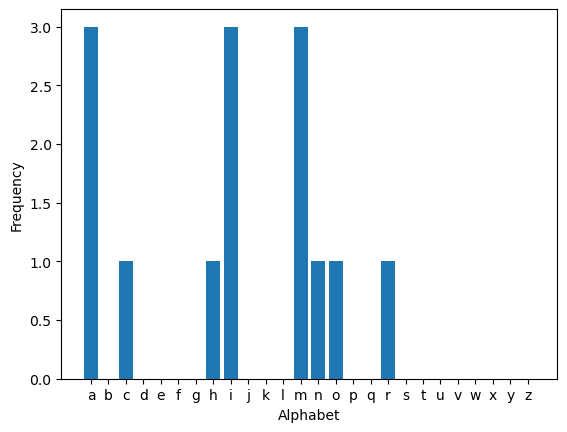

In [ ]:
plot_letters_frequency_analysis("mi chiamo marina")

***
## FIND PLACE OF LETTERS IN STRING

In [ ]:
def find_letters_in_string(msg: str, word: str):
    """Finds the indices of the letters in a string

    Args:
        msg (str): the string to search in
        word (str): the word to search for

    Returns:
        print the indices of the letters in the string
    """
    
    if word not in msg:
        print(f"Could not find \"{word}\"")
        return
    
    places = []
    for i in range(len(msg) - len(word) + 1):
        if msg[i:i+len(word)] == word:
            places.append(i)
    
    print(f"Found \"{word}\" at positions {places}")
    print(text.replace(word, "_\033[1m" + "\033[3m" + word.upper() + "\033[0m" + "\033[0m_"))
        
text = "ivjdzopdbifvezdakopzehoizjadkpefjvhioezapzdjifvdckzapojvsjdkpfifvhoeozdshiokdsefiejkdzaifvheiodzkaopivfhijkdspoofhirejadzopfivhdcqsdkjfshfkdkzaezvjiodkslsfdivohzjdzpfojvikcsqdkojivjkdlofpjvihdjkspoqsvjidckqkopdsjihjdazkojivohckdzkopjk"
word = "iv"
find_letters_in_string(text, word)

Found "iv" at positions [0, 100, 124, 156, 178, 221]
_IV_jdzopdbifvezdakopzehoizjadkpefjvhioezapzdjifvdckzapojvsjdkpfifvhoeozdshiokdsefiejkdzaifvheiodzkaop_IV_fhijkdspoofhirejadzopf_IV_hdcqsdkjfshfkdkzaezvjiodkslsfd_IV_ohzjdzpfojvikcsqdkoj_IV_jkdlofpjvihdjkspoqsvjidckqkopdsjihjdazkoj_IV_ohckdzkopjk


# Extract substring from string 

In [ ]:
def extract_characters(input_string, x, n):
    """Extracts characters from a string
    
    Args:
        input_string (str): the string to extract characters from
        x (int): the starting index
        n (int): the step size

    Returns:
        str: the extracted characters
    """
    result = ""
    for i in range(len(input_string)):
        if (i + 1) % n == x:
            result += input_string[i]
    return result

# Example

print(extract_characters("HelloWorld!", 0, 3))

l r!
